# Assignment 4 – CSCN8030

# Adding imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from sklearn.metrics import roc_curve, auc

# Load the dataset

In [37]:
# Get the sheet name
xls = pd.ExcelFile("./data/loblaws.xlsx")
xls.sheet_names

['Data Dict', 'E Comm']

In [38]:
# Load the data from 'E Comm'
df = pd.read_excel("./data/loblaws.xlsx", sheet_name="E Comm")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploratory Data Analysis

In [39]:
# Summary statistics for numerical columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [40]:
# Visualizing the churn distribution to understand imbalance.
df.describe()

df.columns.to_list()

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

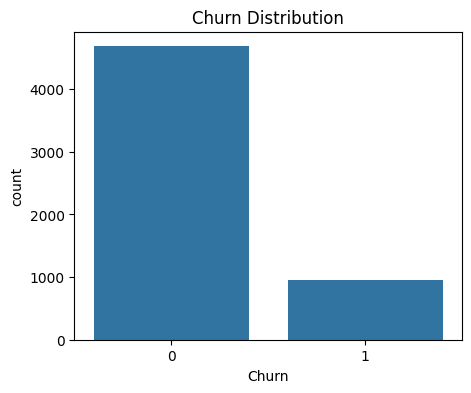

In [41]:
# Visualizing the churn distribution to understand imbalance.
plt.figure(figsize=(5,4))
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.show()

# Identifing the numerical and categorical columns

In [42]:
# Separate numeric and categorical columns for preprocessing.
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target variable from numeric list if present.
if "Churn" in numeric_cols:
    numeric_cols.remove("Churn")

print("The numerical columns are:")
print(numeric_cols)
print("\n")
print("The categorical columns are:")
print(categorical_cols)


The numerical columns are:
['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


The categorical columns are:
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


# Data Preprocessing

In [43]:
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])


# Train/Test Split

In [44]:
# Splitting dataset with stratification to maintain churn ratio.
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape


((4504, 19), (1126, 19))

# Train and Compare models

In [ ]:
# Training three models to compare performance:
# 1. Logistic Regression
# 2. Gradient Boosting
# 3. Random Forest


models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}

results = {}

# Loop through models and train each one
for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    # training
    pipe.fit(X_train, y_train)

    # predictions
    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:,1]

    # Store performance metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs)
    }

# Display model comparison
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.891652,0.757576,0.526316,0.621118,0.885003
Gradient Boosting,0.913854,0.820690,0.626316,0.710448,0.943562
Random Forest,0.968028,0.981250,0.826316,0.897143,0.997281


# Final model chosen - Random Forest

In [46]:
# Random Forest performed the best, so we retrain it fully.

best_model = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

best_model.fit(X_train, y_train)
rf_preds = best_model.predict(X_test)

accuracy_score(y_test, rf_preds)


0.9680284191829485

# Confusion matrix

In [47]:
# Confusion Matrix gives insight into:
# - True positives
# - True negatives
# - False positives
# - False negatives

cm = confusion_matrix(y_test, rf_preds)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])
cm_df


,Predicted 0,Predicted 1
Actual 0,933,3
Actual 1,33,157


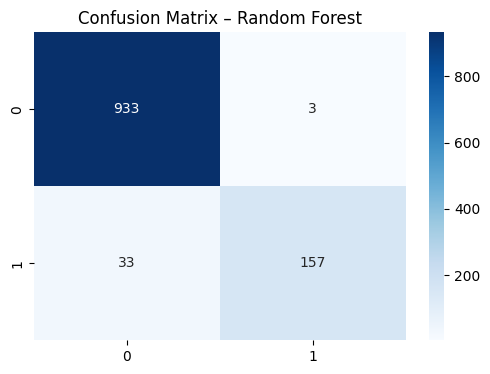

In [48]:
# Visual heatmap of confusion matrix.
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [49]:
# Correlation Heatmap

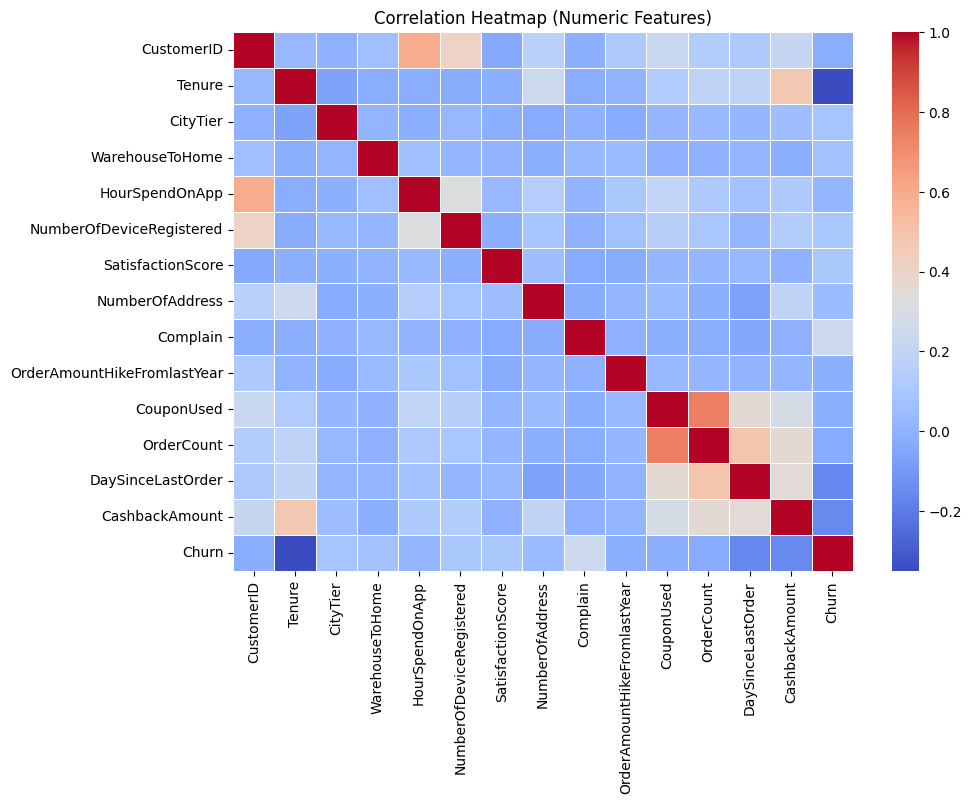

In [50]:
# Heatmap for correlation among numeric features including target.
plt.figure(figsize=(10, 7))
numeric_df = df[numeric_cols + ['Churn']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# Boxplots ( Numerical vs churn)

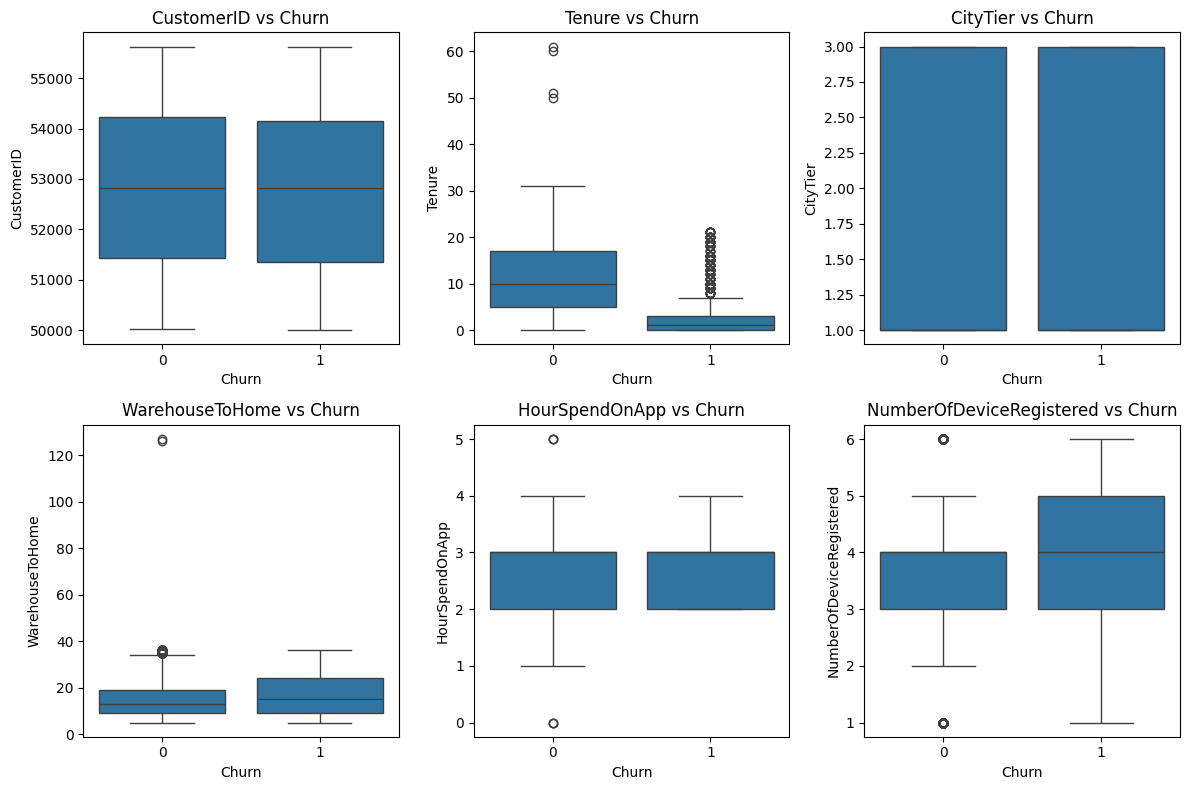

In [51]:
# Visualizing distribution of numeric columns by churn status.
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df['Churn'], y=df[col])
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


# Categorical Countplots

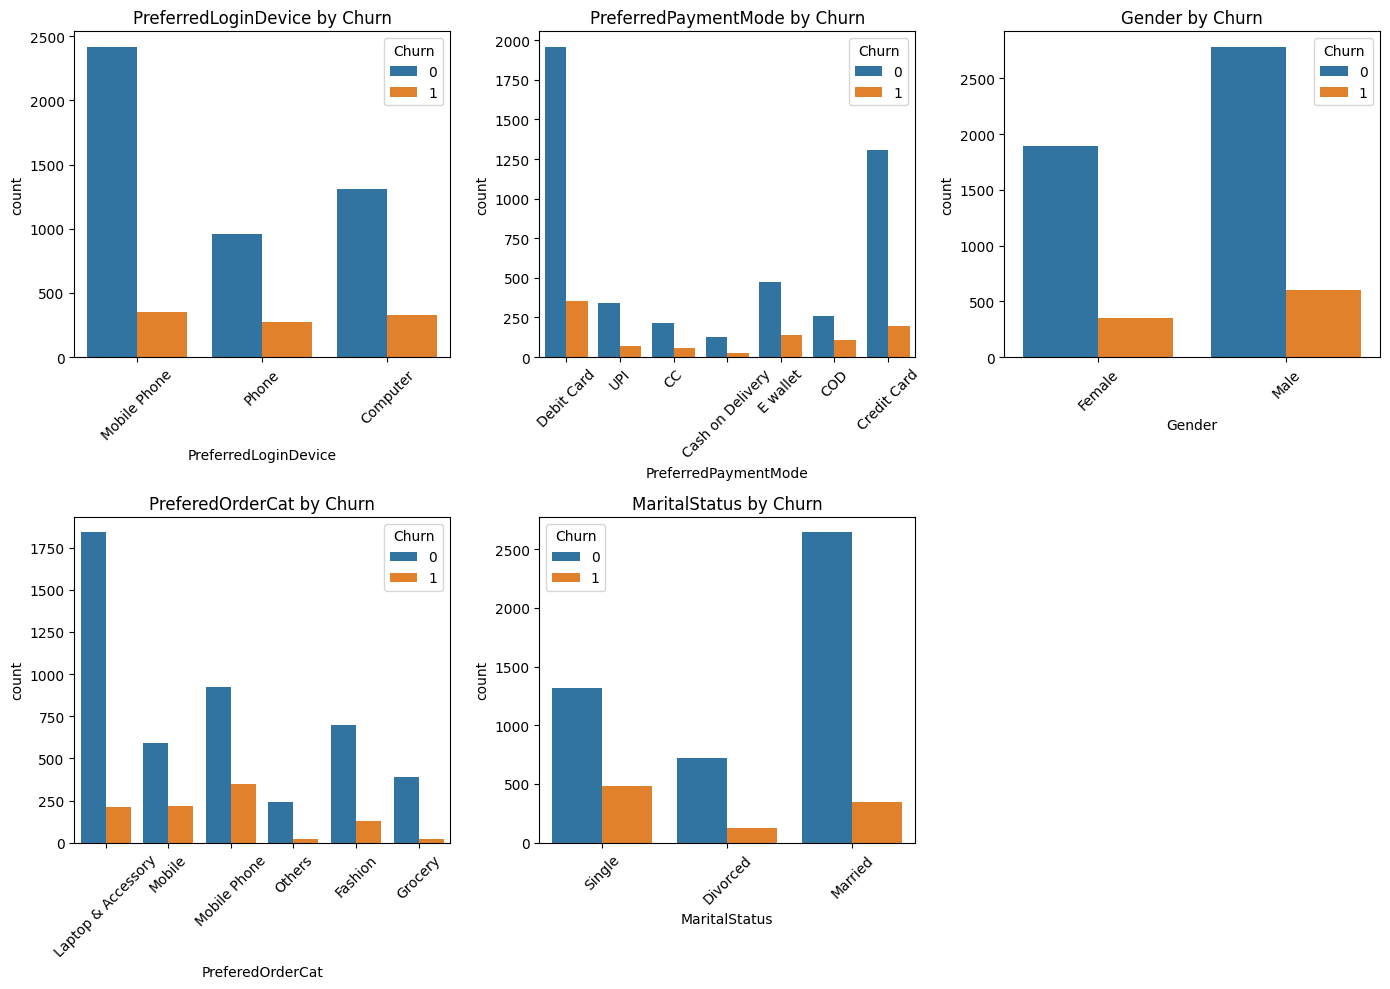

In [52]:
# Visualizing churn rate across categorical features.
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.xticks(rotation=45)
    plt.title(f"{col} by Churn")

plt.tight_layout()
plt.show()


# Churn rate of Categorical Variables

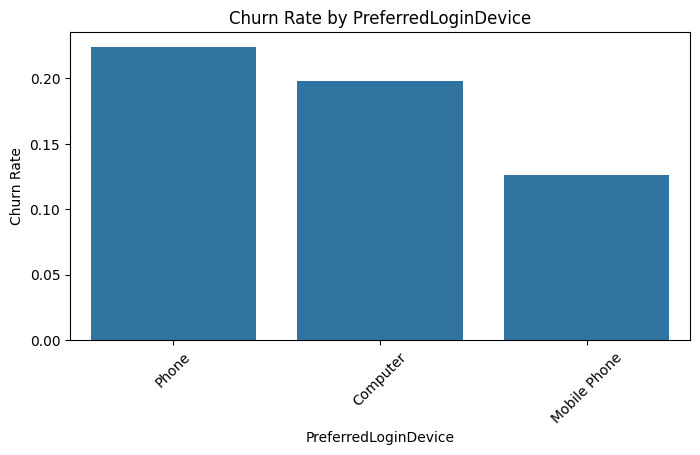

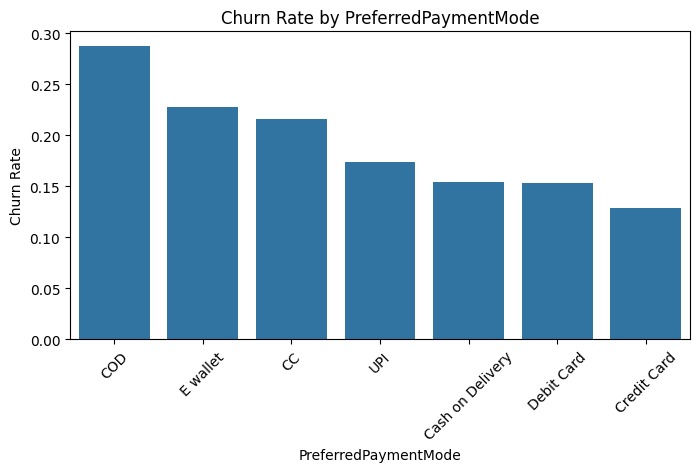

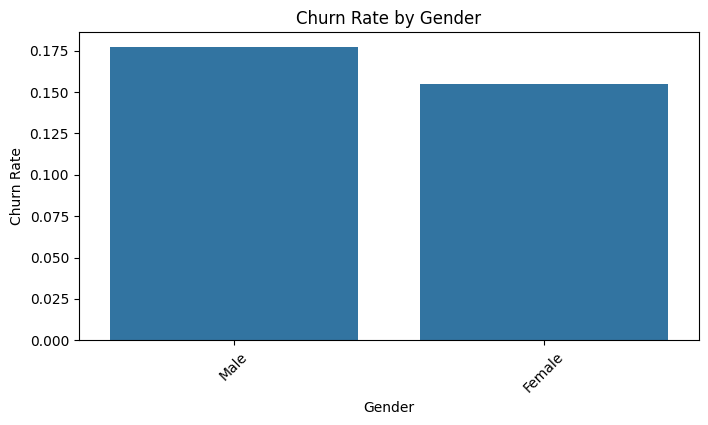

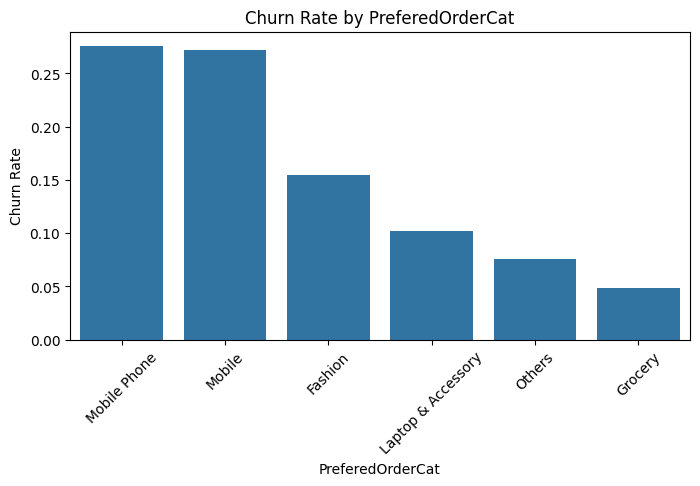

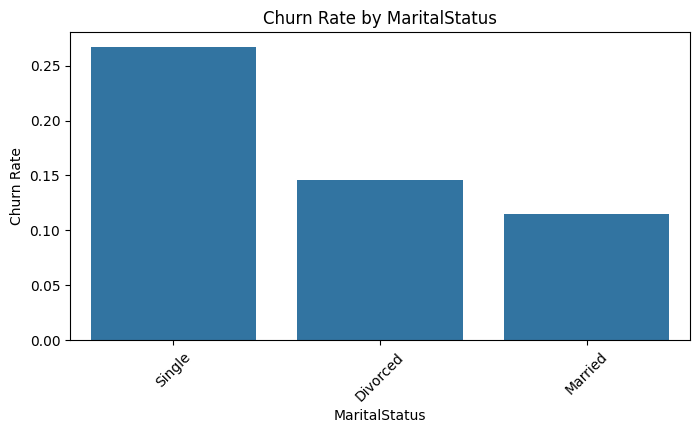

In [53]:

# Churn probability for each category in top categorical columns.
for col in categorical_cols[:5]:
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Churn Rate")
    plt.show()



# Histogram for numerical features

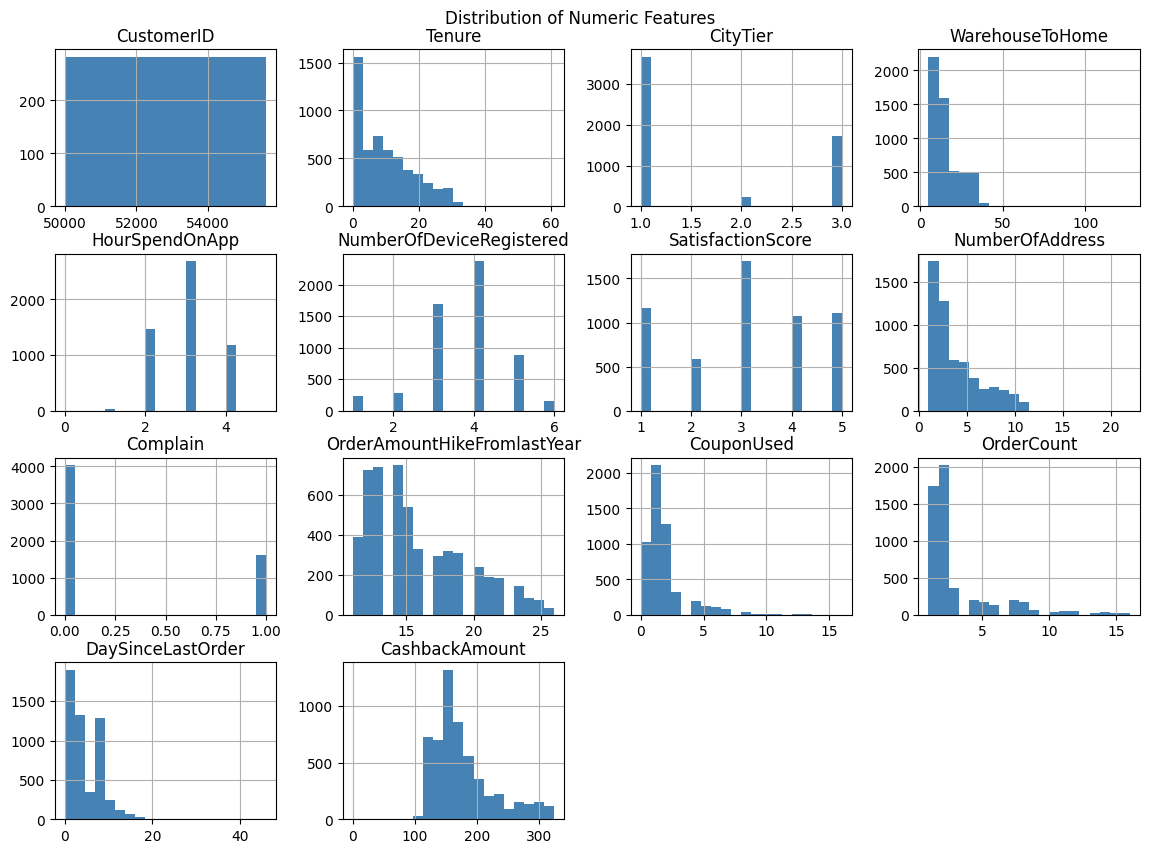

In [54]:
df[numeric_cols].hist(figsize=(14, 10), bins=20, color='steelblue')
plt.suptitle("Distribution of Numeric Features", y=0.92)
plt.show()


# ROC Curve

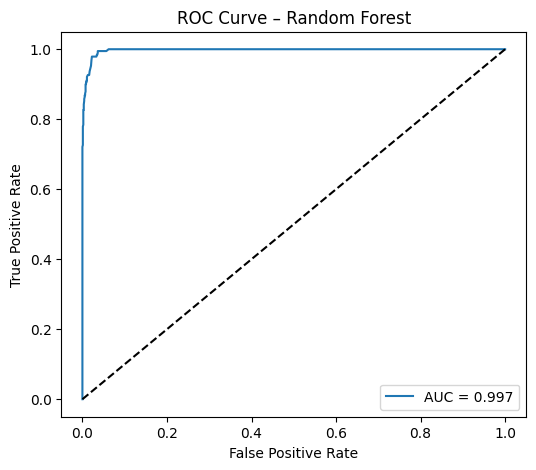

In [55]:


y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Feature Importance

In [56]:
# Extracting one-hot encoded feature names.
rf = best_model.named_steps['model']
ohe = best_model.named_steps['prep'].named_transformers_['cat']

cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = numeric_cols + list(cat_feature_names)

# Ranking feature importance
importances = rf.feature_importances_
fi = pd.DataFrame({"Feature": feature_names, "Importance": importances})
fi = fi.sort_values("Importance", ascending=False).head(15)
fi


,Feature,Importance
1,Tenure,0.196584
13,CashbackAmount,0.087955
3,WarehouseToHome,0.062673
8,Complain,0.058418
7,NumberOfAddress,0.056181
12,DaySinceLastOrder,0.055488
0,CustomerID,0.054113
9,OrderAmountHikeFromlastYear,0.051547
6,SatisfactionScore,0.044562
5,NumberOfDeviceRegistered,0.033832


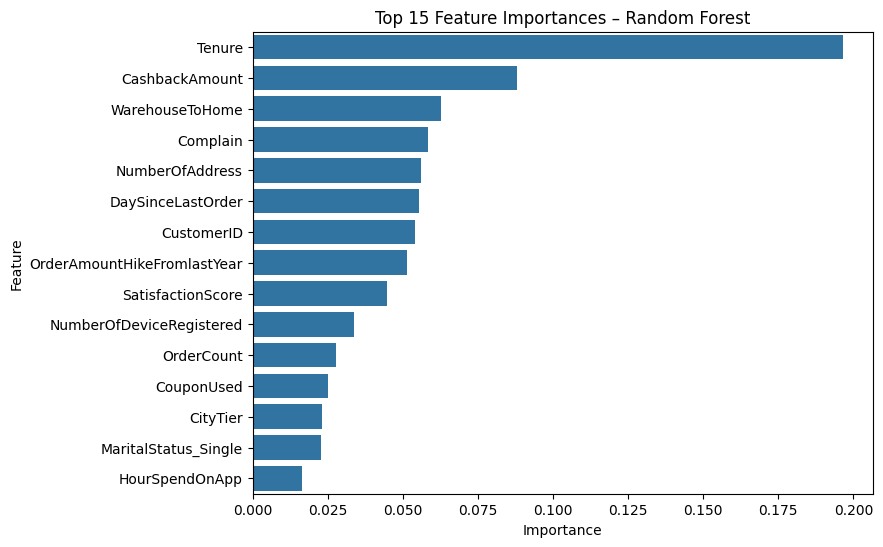

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=fi)
plt.title("Top 15 Feature Importances – Random Forest")
plt.show()